## 预测房价

### 准备房价

In [1]:
import torch

In [2]:
x = torch.linspace(0, 100, 100).type(torch.FloatTensor)
rand = torch.randn(100)*10
y = x + rand

In [3]:
x, y

(tensor([  0.0000,   1.0101,   2.0202,   3.0303,   4.0404,   5.0505,   6.0606,
           7.0707,   8.0808,   9.0909,  10.1010,  11.1111,  12.1212,  13.1313,
          14.1414,  15.1515,  16.1616,  17.1717,  18.1818,  19.1919,  20.2020,
          21.2121,  22.2222,  23.2323,  24.2424,  25.2525,  26.2626,  27.2727,
          28.2828,  29.2929,  30.3030,  31.3131,  32.3232,  33.3333,  34.3434,
          35.3535,  36.3636,  37.3737,  38.3838,  39.3939,  40.4040,  41.4141,
          42.4242,  43.4343,  44.4444,  45.4545,  46.4646,  47.4747,  48.4848,
          49.4949,  50.5051,  51.5152,  52.5253,  53.5354,  54.5455,  55.5556,
          56.5657,  57.5758,  58.5859,  59.5960,  60.6061,  61.6162,  62.6263,
          63.6364,  64.6465,  65.6566,  66.6667,  67.6768,  68.6869,  69.6970,
          70.7071,  71.7172,  72.7273,  73.7374,  74.7475,  75.7576,  76.7677,
          77.7778,  78.7879,  79.7980,  80.8081,  81.8182,  82.8283,  83.8384,
          84.8485,  85.8586,  86.8687,  87.8788,  88

In [4]:
x_train = x[: -10]
x_test = x[-10 :]
y_train = y[: -10]
y_test = y[-10 :]

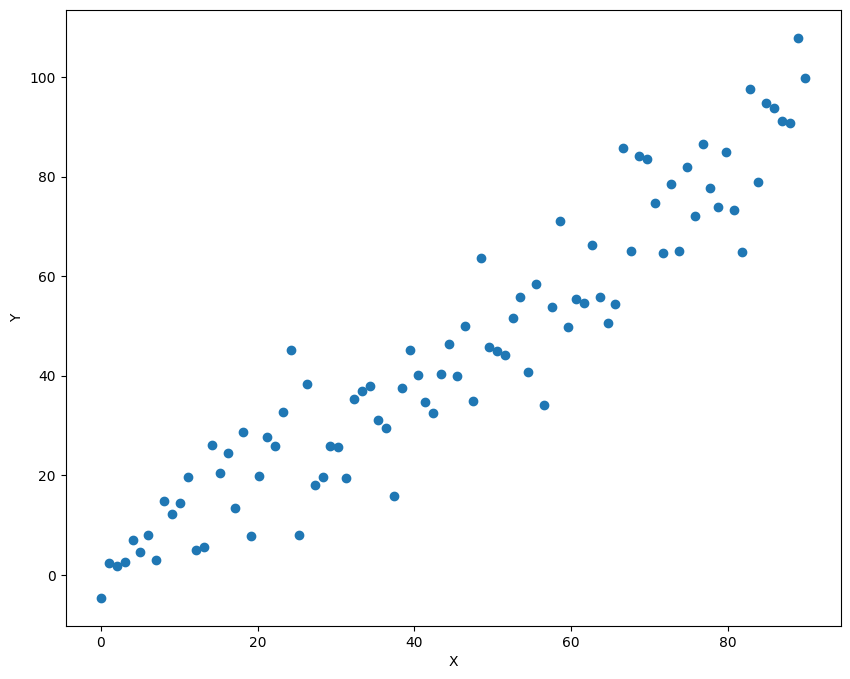

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
#
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 设计模型

### 训练

In [6]:
a = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

In [7]:
learning_rate = 1e-4

In [9]:
for i in range(1000):
  predictions = a.expand_as(x_train) * x_train + b.expand_as(x_train)
  loss = torch.mean((predictions - y_train) ** 2)
  print('loss:', loss)
  loss.backward()
  a.data.add_(-learning_rate * a.grad.data)
  b.data.add_(-learning_rate * b.grad.data)

  a.grad.data.zero_()
  b.grad.data.zero_()

loss: tensor(431.9895, grad_fn=<MeanBackward0>)


loss: tensor(154.8979, grad_fn=<MeanBackward0>)
loss: tensor(96.7651, grad_fn=<MeanBackward0>)
loss: tensor(84.5690, grad_fn=<MeanBackward0>)
loss: tensor(82.0103, grad_fn=<MeanBackward0>)
loss: tensor(81.4734, grad_fn=<MeanBackward0>)
loss: tensor(81.3608, grad_fn=<MeanBackward0>)
loss: tensor(81.3371, grad_fn=<MeanBackward0>)
loss: tensor(81.3321, grad_fn=<MeanBackward0>)
loss: tensor(81.3310, grad_fn=<MeanBackward0>)
loss: tensor(81.3307, grad_fn=<MeanBackward0>)
loss: tensor(81.3307, grad_fn=<MeanBackward0>)
loss: tensor(81.3306, grad_fn=<MeanBackward0>)
loss: tensor(81.3306, grad_fn=<MeanBackward0>)
loss: tensor(81.3305, grad_fn=<MeanBackward0>)
loss: tensor(81.3305, grad_fn=<MeanBackward0>)
loss: tensor(81.3304, grad_fn=<MeanBackward0>)
loss: tensor(81.3304, grad_fn=<MeanBackward0>)
loss: tensor(81.3303, grad_fn=<MeanBackward0>)
loss: tensor(81.3303, grad_fn=<MeanBackward0>)
loss: tensor(81.3302, grad_fn=<MeanBackward0>)
loss: tensor(81.3302, grad_fn=<MeanBackward0>)
loss: tensor

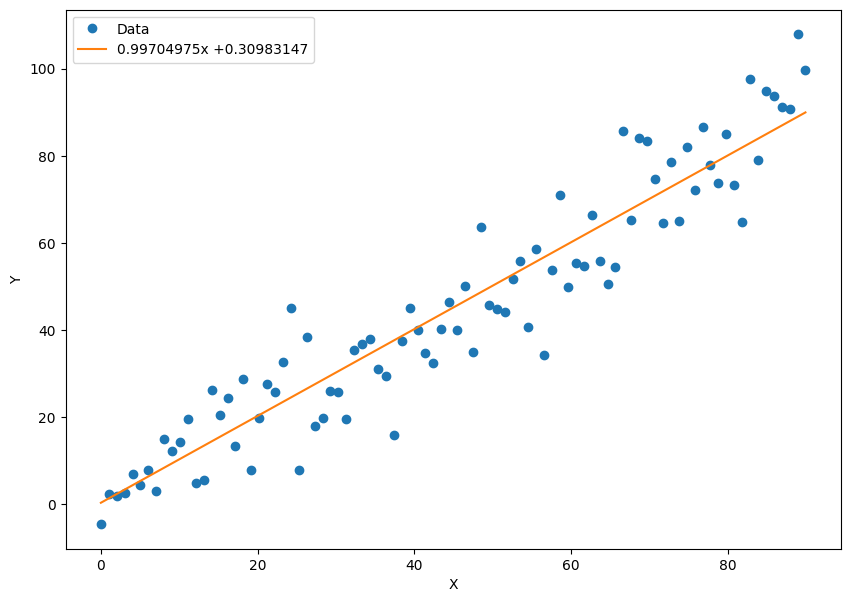

In [11]:
x_data = x_train.data.numpy()
plt.figure(figsize=(10, 7))
xplot, = plt.plot(x_data, y_train.data.numpy(), 'o')
yplot, = plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', str1])
plt.show()

### 预测

In [12]:
predictions = a.expand_as(x_test) * x_test + b.expand_as(x_test)
predictions

tensor([ 90.9507,  91.9578,  92.9650,  93.9721,  94.9792,  95.9863,  96.9934,
         98.0006,  99.0077, 100.0148], grad_fn=<AddBackward0>)

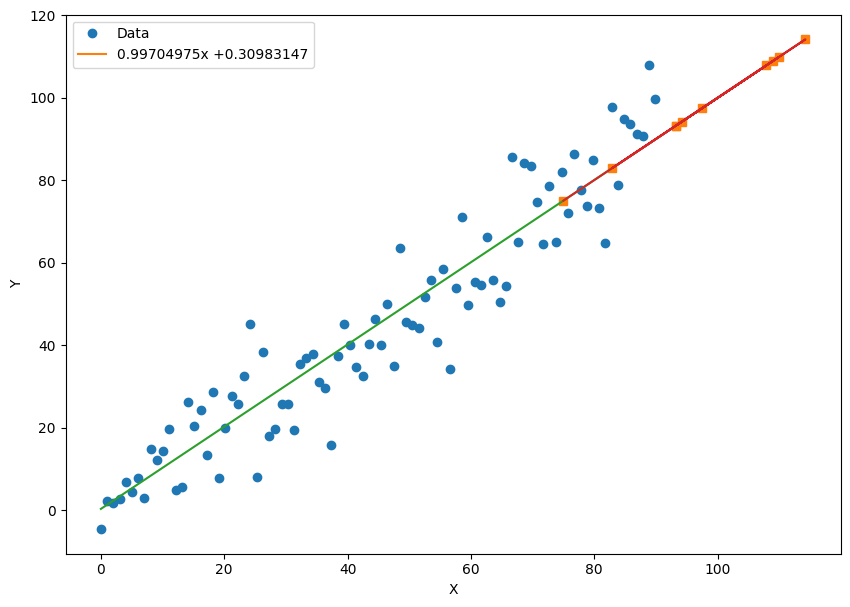

In [14]:
import numpy as np
x_data = x_train.data.numpy()
x_pred = y_test.data.numpy()
plt.figure(figsize=(10, 7))
plt.plot(x_data, y_train.data.numpy(), 'o')
plt.plot(x_pred, y_test.data.numpy(), 's')
x_data = np.r_[x_data, x_test.data.numpy()]
plt.plot(x_data, a.data.numpy() * x_data + b.data.numpy())
plt.plot(x_pred, a.data.numpy() * x_pred + b.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
str1 = str(a.data.numpy()[0]) + 'x +' + str(b.data.numpy()[0])
plt.legend([xplot, yplot], ['Data', str1])
plt.show()
